In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import tree, metrics
from sklearn import preprocessing
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load data set, drop col with numbers, drop high Pearson columns
data = pd.read_csv("marital_satisfaction_data_wrangled_final.csv")
data = data.drop(['Unnamed: 0','spouse_satisfaction','relationship_satisfaction'], axis=1)

# Drop Croatia + Cahtolic (highest n's)
data = pd.get_dummies(data, prefix=['rel','cnty'], columns=['religion','country'])
data = data.drop(['rel_Catholic','cnty_Croatia'], axis=1)



data['marital_satisfaction'].describe()

count    7178.000000
mean        1.739203
std         1.452407
min        -3.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: marital_satisfaction, dtype: float64

In [3]:
X = data.drop(['marital_satisfaction'], axis=1)
y = data.marital_satisfaction

In [4]:
# VIF on unscaled data

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
vif

,feature,VIF
0,age,47.345479
1,edu_level,21.953830
2,spouse_respect,17.276199
3,spouse_pride,12.882883
4,marriage_duration_years,12.569750
...,...,...
65,rel_Buddhist,1.124744
66,rel_Other,1.096834
67,rel_Jehovah,1.080268
68,rel_Jewish,1.044396


In [5]:
# Kept eliminating columns until VIF was under 10 for all features

Xvif10 = X.drop(['age','edu_level','spouse_respect','spouse_love','spouse_pride'], axis=1)
vif = pd.DataFrame()
vif["feature"] = Xvif10.columns
vif["VIF"]=[variance_inflation_factor(Xvif10.values, i) for i in range(len(Xvif10.columns))]
vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
vif

,feature,VIF
0,enjoy_spouse_company,9.846314
1,spouse_attraction,9.516770
2,indv_pride_in_children,9.204912
3,rel_Muslim,9.084685
4,sex,8.834150
...,...,...
60,rel_Buddhist,1.120843
61,rel_Other,1.094645
62,rel_Jehovah,1.077681
63,rel_Jewish,1.042641


In [6]:
# Scale X with Robust Scaler

cols= list(X.columns)
scaler = preprocessing.RobustScaler()
Xsc = scaler.fit_transform(X)
Xsc = pd.DataFrame(Xsc, columns=cols)
Xsc


,sex,age,marriage_duration_years,num_children_total,num_children_inhome,edu_level,material_situation,religiosity,pension,enjoy_spouse_company,...,cnty_Romania,cnty_Russia,cnty_Saudi Arabia,cnty_Slovakia,cnty_South Korea,cnty_Spain,cnty_Switzerland,cnty_Turkey,cnty_U.K.,cnty_Uganda
0,-1.0,-1.058824,-0.555556,-2.0,-0.5,0.0,0.0,0.0,-0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,-0.588235,-0.500000,-1.0,-0.5,0.0,0.0,1.0,-0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,-0.529412,-0.277778,-2.0,-0.5,0.0,0.0,0.0,-0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,-0.529412,-0.277778,-1.0,0.0,0.0,0.0,1.0,-1.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,-0.647059,-0.166667,-2.0,-0.5,-1.0,1.0,0.5,-1.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,-1.0,-0.411765,-0.277778,0.0,1.0,0.0,2.0,0.0,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7174,-1.0,-0.176471,-0.333333,2.0,1.5,0.0,0.0,0.0,0.666667,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7175,-1.0,-0.411765,-0.555556,-1.0,0.0,0.0,1.0,1.5,-0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7176,-1.0,-0.705882,-0.500000,0.0,0.5,0.0,1.0,1.5,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
# VIF for scaled data

vifsc = pd.DataFrame()
vifsc["feature"] = Xsc.columns
vifsc["VIF"]=[variance_inflation_factor(Xsc.values, i) for i in range(len(Xsc.columns))]
vifsc.sort_values(by='VIF', ascending=False).head(n=10)

# Is this done correctly? If so, do I basically keep everything? (except possibly duration)

,feature,VIF
32,rel_Muslim,9.137914
48,cnty_India,6.354239
29,rel_Hindu,6.078286
2,marriage_duration_years,5.720534
1,age,5.092878
50,cnty_Iran,4.949703
34,rel_Orthodox,4.612692
23,indv_pride_in_children,4.218453
19,natl_pride_in_children,3.595851
67,cnty_Turkey,3.363938


In [8]:
# Kept eliminating columns until VIF was under 5 for all features, scaled this time

Xscvif5 = Xsc.drop(['rel_Muslim', 'cnty_India', 'marriage_duration_years'], axis=1)
vif = pd.DataFrame()
vif["feature"] = Xscvif5.columns
vif["VIF"]=[variance_inflation_factor(Xscvif5.values, i) for i in range(len(Xscvif5.columns))]
vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
vif

,feature,VIF
0,rel_Orthodox,4.353527
1,indv_pride_in_children,4.197491
2,natl_pride_in_children,3.582275
3,spouse_pride,3.329027
4,spouse_attraction,3.233326
...,...,...
62,rel_Buddhist,1.099035
63,rel_Other,1.083592
64,rel_Jehovah,1.069476
65,rel_Jewish,1.036192


In [9]:
# Turn y into classification problem. Maybe change threshold on this?

y.replace(to_replace=[-3,-2,-1,0,1,2], value=0, inplace=True)
y.replace(to_replace=[3], value=1, inplace=True)
y.value_counts()

0    4442
1    2736
Name: marital_satisfaction, dtype: int64

In [10]:
# Logistic Reg, Use scaled
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(Xscvif5,y,test_size=.25, random_state=8)
# Random Forest, Use unscaled? Could also use scaled, more vars after all
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(Xvif10,y,test_size=.25, random_state=8)
# SVM, Use scaled
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(Xscvif5,y,test_size=.25, random_state=8)

In [11]:
# Train Logistic Reg

log_reg = sm.Logit(y_train_logit, X_train_logit).fit()
y_pred_logit = log_reg.predict(X_test_logit)

# How to address this error?

         Current function value: 0.485308
         Iterations: 35


C:\Users\webge\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
from sklearn.metrics import roc_curve, auc

In [13]:
logit_fpr, logit_tpr, threshold = roc_curve(y_test_logit, y_pred_logit)
auc_logit = auc(logit_fpr, logit_tpr)


print(auc_logit)

0.8164418538807805


In [14]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     marital_satisfaction   No. Observations:                 5383
Model:                            Logit   Df Residuals:                     5316
Method:                             MLE   Df Model:                           66
Date:                  Fri, 26 Mar 2021   Pseudo R-squ.:                  0.2673
Time:                          15:47:26   Log-Likelihood:                -2612.4
converged:                        False   LL-Null:                       -3565.4
Covariance Type:              nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
sex                                      -0.2531      0.068     -3.721      0.000      -0.386      -0.120
age                                       0.0504      0.064      0.786      0.432      -0.075       0.176
num_children_total                        0.0796      0.041      1.954      0.051      -0.000       0.159
num_children_inhome                       0.0169      0.070      0.240      0.810      -0.121       0.154
edu_level                                -0.1255      0.038     -3.269      0.001      -0.201      -0.050
material_situation                        0.0038      0.046      0.082      0.935      -0.086       0.094
religiosity                               0.0448      0.047      0.948      0.343      -0.048       0.137
pension                                  -0.0771      0.058     -1.336      0.181      -0.190       0.036
enjoy_spouse_company                      0.2931      0.078      3.772      0.000       0.141       0.445
happiness                                 0.7372      0.074      9.956      0.000       0.592       0.882
spouse_attraction                         0.5611      0.083      6.722      0.000       0.398       0.725
spouse_enjoy_doing_things_together        0.2893      0.073      3.984      0.000       0.147       0.432
spouse_enjoy_cuddling                     0.1762      0.074      2.382      0.017       0.031       0.321
spouse_respect                            0.1185      0.115      1.027      0.304      -0.108       0.344
spouse_pride                              0.6162      0.101      6.083      0.000       0.418       0.815
spouse_romance                            0.5272      0.051     10.381      0.000       0.428       0.627
spouse_love                               0.0715      0.085      0.841      0.400      -0.095       0.238
natl_pride_in_parents                    -0.0103      0.063     -0.165      0.869      -0.134       0.113
natl_pride_in_children                   -0.0752      0.037     -2.045      0.041      -0.147      -0.003
natl_aging_parents_live_with_children    -0.0067      0.071     -0.094      0.925      -0.146       0.133
natl_children_live_at_home_marraige       0.0143      0.051      0.280      0.780      -0.086       0.114
indv_pride_in_parents                    -0.0153      0.064     -0.239      0.811      -0.141       0.111
indv_pride_in_children                    0.1067      0.041      2.607      0.009       0.026       0.187
indv_aging_parents_live_with_children     0.0436      0.067      0.649      0.516      -0.088       0.175
indv_children_live_at_home_marraige       0.0715      0.070      1.018      0.309      -0.066       0.209
rel_999.0                                 0.3292      0.332      0.993      0.321      -0.321       0.979
rel_Buddhist                             -0.0806      0.362     -0.223      0.824      -0.789       0.628
rel_Evangelic                            16

In [15]:
# Train random forest

rf=ensemble.RandomForestClassifier()
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test_rf)

In [16]:
rf_fpr, rf_tpr, threshold = roc_curve(y_test_rf, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)
print(auc_rf)

0.7439465488445064


In [17]:
fi_rf = pd.DataFrame(rf.feature_importances_, index = X_train_rf.columns, columns=['importance']).sort_values('importance', ascending=False)
fi_rf

,importance
happiness,0.073516
marriage_duration_years,0.068823
spouse_romance,0.067859
spouse_attraction,0.052868
spouse_enjoy_doing_things_together,0.048584
...,...
cnty_Romania,0.001215
cnty_Canada,0.001025
rel_Spiritualism,0.001000
rel_Jehovah,0.000715


In [18]:
from sklearn.svm import SVC
#Train SVM

svc=SVC()
svc.fit(X_train_svc, y_train_svc)
y_pred_svc = svc.predict(X_test_svc)

In [19]:
svc_fpr, svc_tpr, threshold = roc_curve(y_test_svc, y_pred_svc)
auc_svc = auc(svc_fpr, svc_tpr)
print(auc_svc)

0.739810045534005


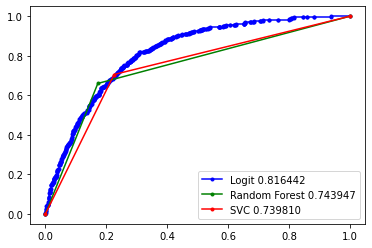

In [20]:
plt.plot(logit_fpr, logit_tpr, marker='.', color='blue', label='Logit %f' % auc_logit)
plt.plot(rf_fpr, rf_tpr, marker='.', color='green', label='Random Forest %f' % auc_rf)
plt.plot(svc_fpr, svc_tpr, marker='.', color='red', label='SVC %f' % auc_svc)

plt.legend()
plt.show()

In [21]:
# Next step?
# In my mind, next is more feature selection. 
# Pick logit since highest AUC, consolidate low-variance vars according to that? Input #14